In [ ]:
#THANMAYA KUMAR BEHERA S
#19BEC4222
#DATA SCIENCE TRANING TEST-2

#saturday-28/05/2022
#Question-1 

'''Given the ‘credit_card’ dataset, below is the data definition:
1) CUSTID: Identification of Credit Card holder (Categorical)
2) BALANCE: Balance amount left in their account to make purchases
3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = 
frequently updated, 0 = not frequently updated)
4) PURCHASES: Amount of purchases made from account
5) ONEOFFPURCHASES: Maximum purchase amount done in one-go
6) INSTALLMENTSPURCHASES: Amount of purchase done in installment
7) CASHADVANCE: Cash in advance given by the user
8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 
(1 = frequently purchased, 0 = not frequently purchased)
9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = 
frequently purchased, 0 = not frequently purchased)
10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being 
done (1 = frequently done, 0 = not frequently done)
11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
13) PURCHASESTRX: Number of purchase transactions made
14) CREDITLIMIT: Limit of Credit Card for user
15) PAYMENTS: Amount of Payment done by user
16) MINIMUM_PAYMENTS: Minimum amount of payments made by user
17) PRCFULLPAYMENT: Percent of full payment paid by user
18) TENURE: Tenure of credit card service for user
    
Perform the following tasks: 
    
Q1. What does the primary analysis of several categorical 
features reveal?

Q2. Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis
b. Outlier Treatment using the Z-score method
c. Deal with correlated variables

Q3. Perform dimensionality reduction using PCA such that the 
95% of the variance is explained

Q4. Find the optimum value of k for k-means clustering using 
the elbow method. Plot the elbow curve

Q5. Find the optimum value of k for k-means clustering using 
the silhouette score method and specify the number of 
observations in each cluster using a bar plot''''
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import sklearn
from sklearn.cluster import KMeans

import sklearn.metrics as metrics
from yellowbrick.cluster import SilhouetteVisualizer



In [2]:
data=pd.read_csv("credit_card.csv")

In [3]:
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [4]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
data.shape

(8950, 18)

In [7]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

(array([8.351e+03, 4.350e+02, 9.200e+01, 3.000e+01, 1.900e+01, 1.100e+01,
        5.000e+00, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([    0.      ,  5072.148336, 10144.296672, 15216.445008,
        20288.593344, 25360.74168 , 30432.890016, 35505.038352,
        40577.186688, 45649.335024, 50721.48336 ]),
 <BarContainer object of 10 artists>)

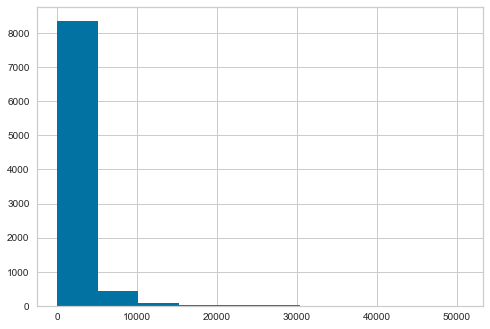

In [9]:
plt.hist(data['PAYMENTS'])

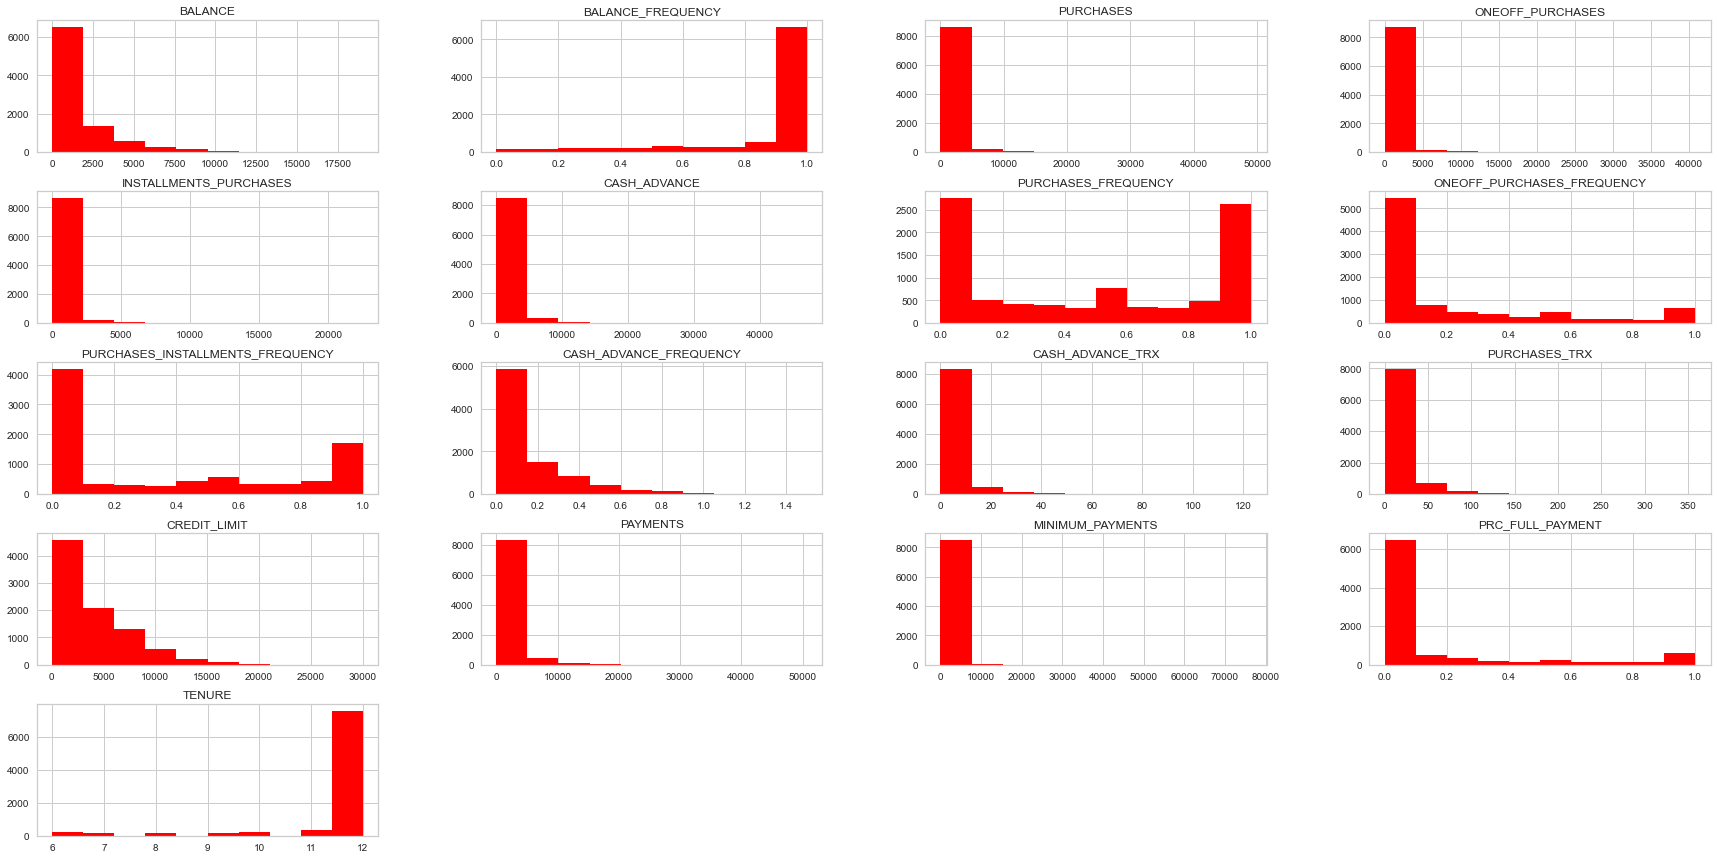

In [11]:

fig=data.hist(figsize=(30,15),color='RED')
plt.show()

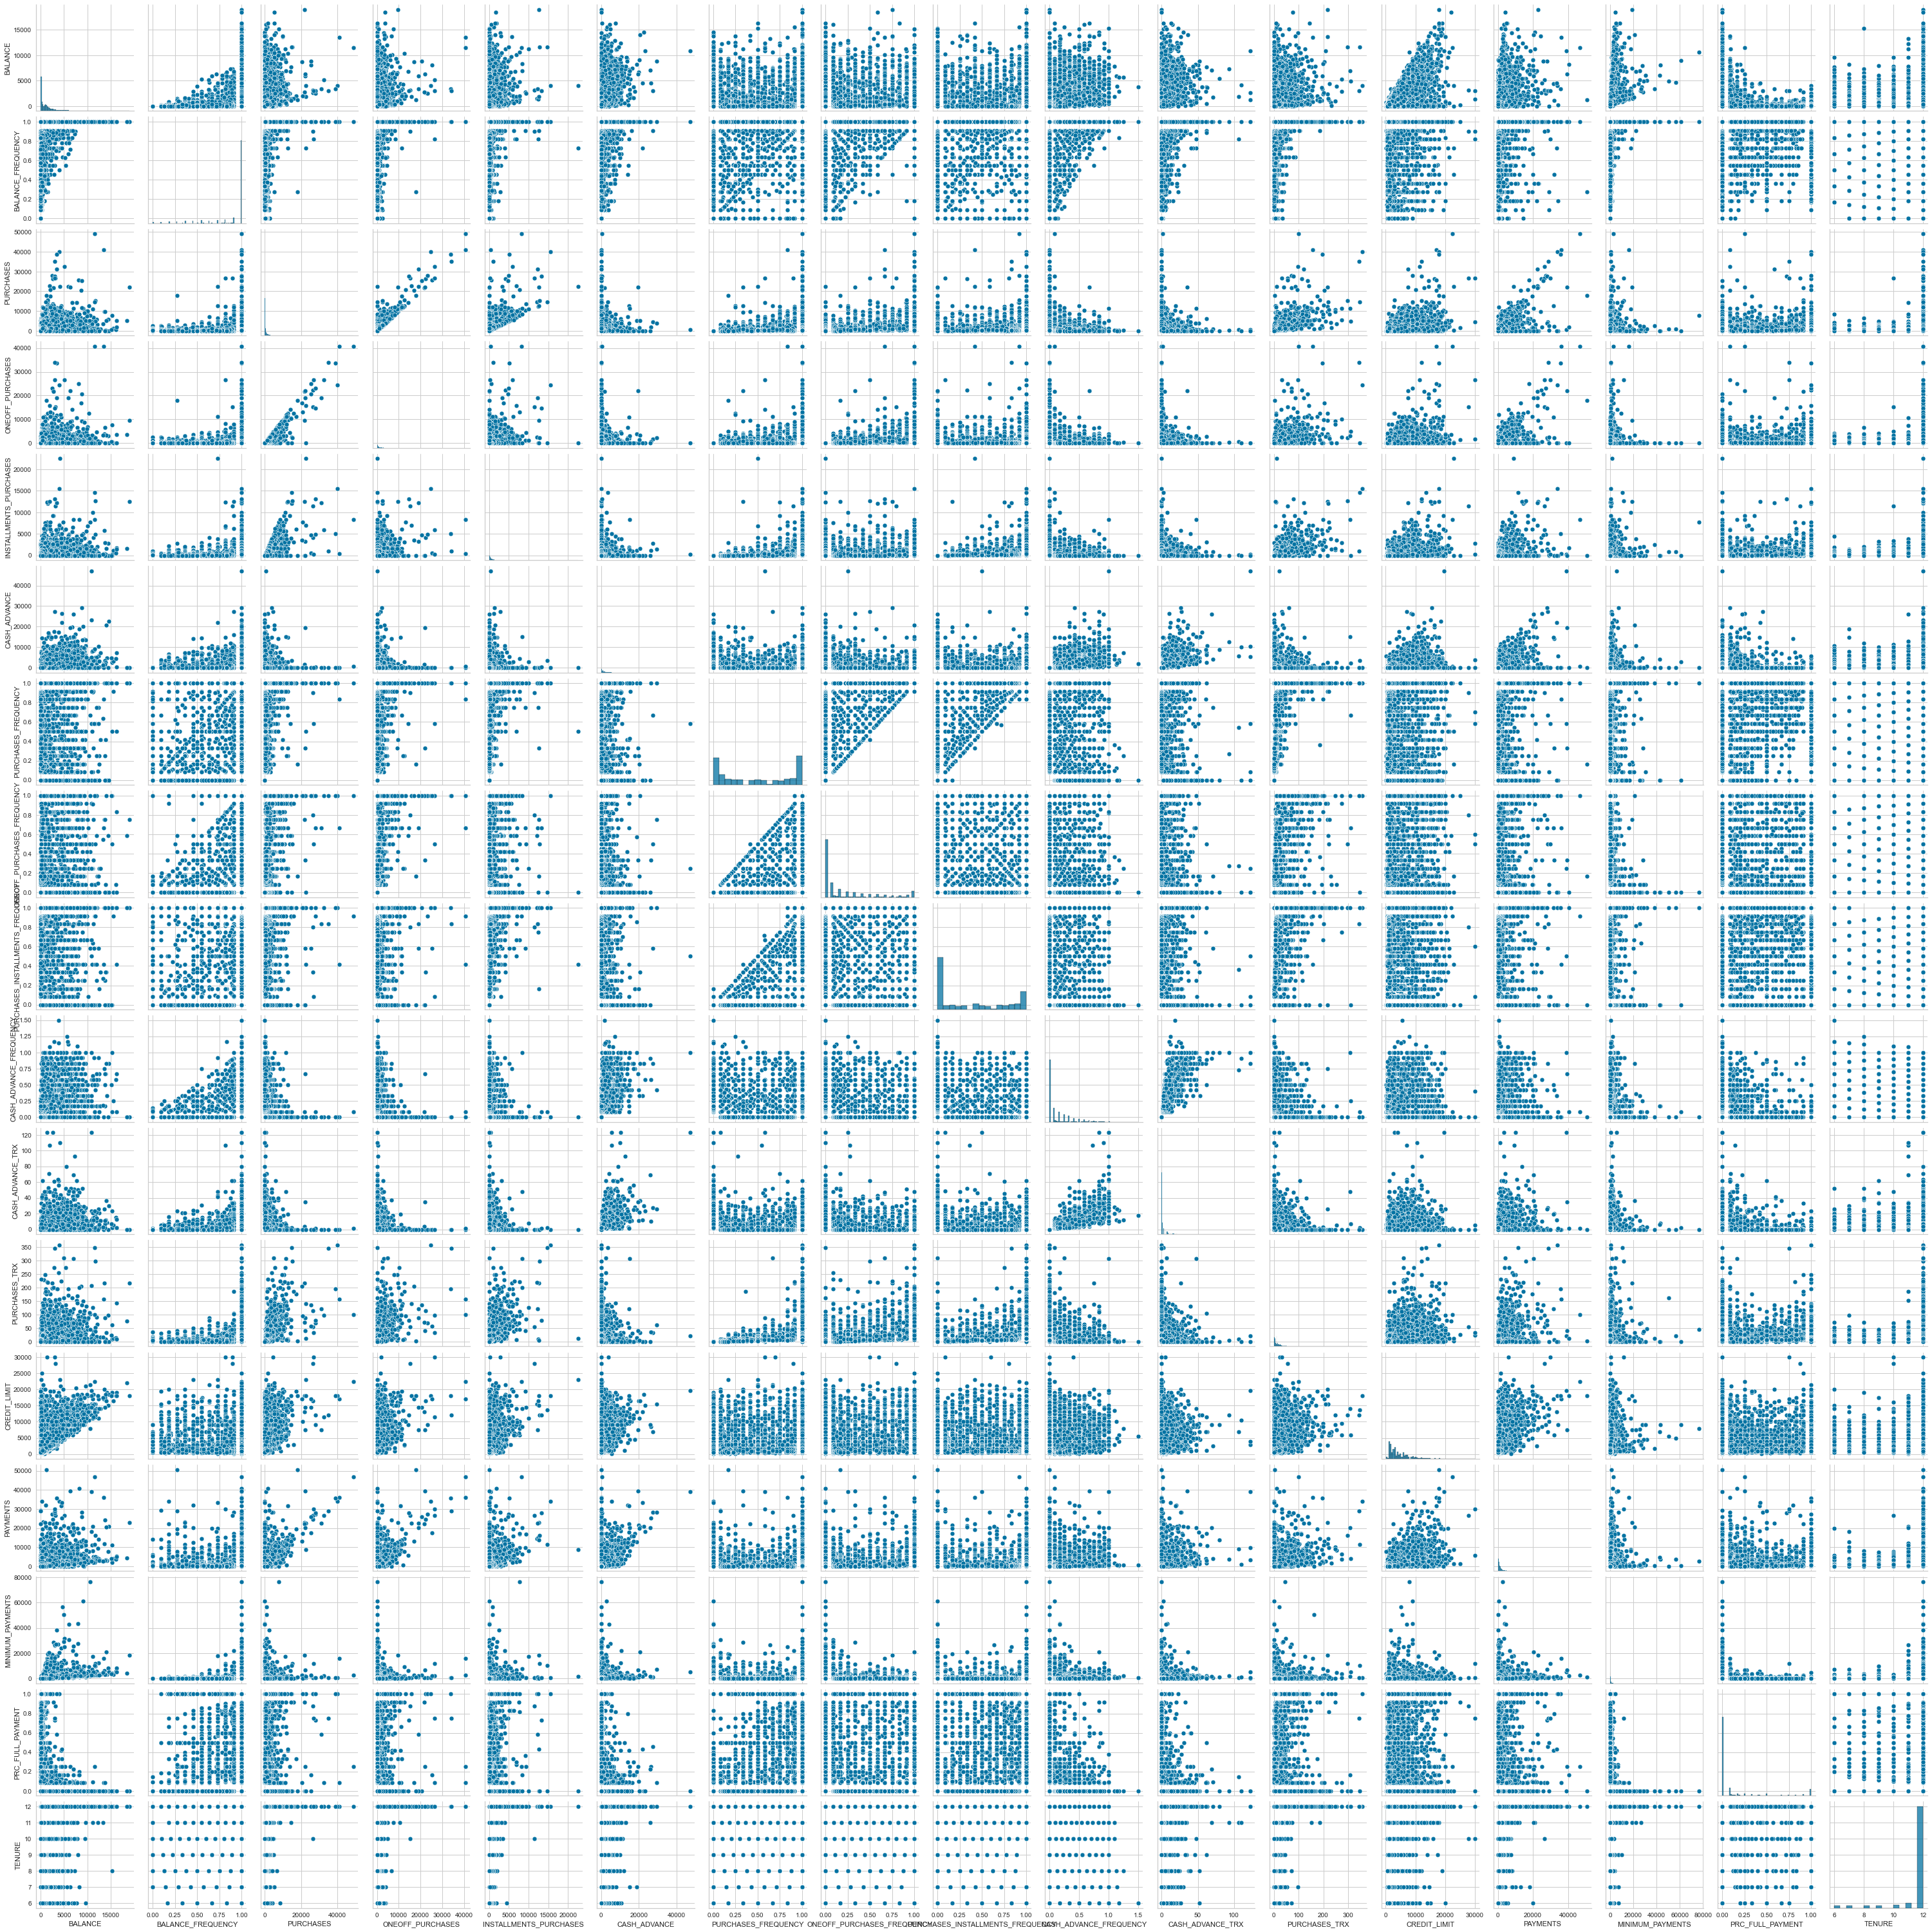

In [12]:
sns.pairplot(data)

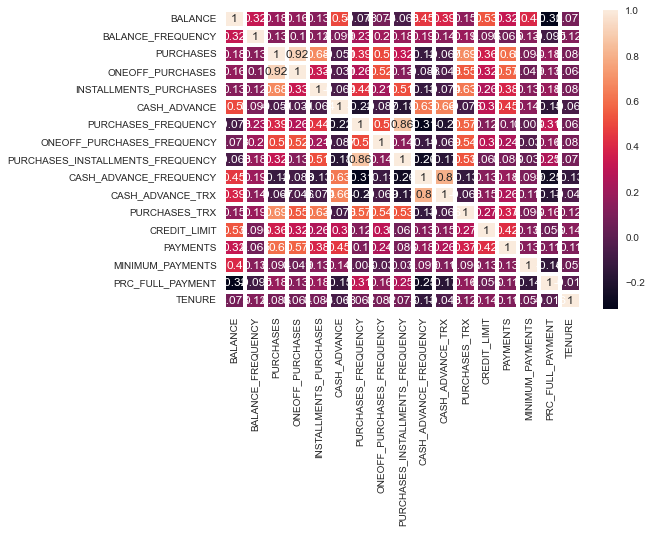

In [14]:

sns.heatmap(data.corr(),annot=True,linewidths=4.0)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x18795e3c2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x18795e3c910>,
 'boxes': [<matplotlib.lines.Line2D at 0x18795e2ee20>],
 'medians': [<matplotlib.lines.Line2D at 0x18795e54070>],
 'fliers': [<matplotlib.lines.Line2D at 0x18795e54400>],
 'means': []}

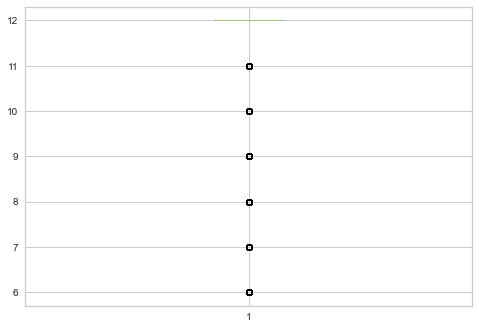

In [15]:
plt.boxplot(x=data["TENURE"])

<AxesSubplot:xlabel='CREDIT_LIMIT'>

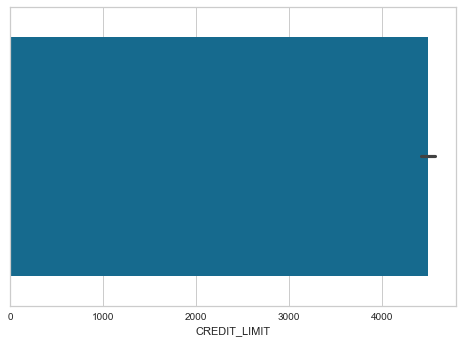

In [16]:

sns.barplot(x=data["CREDIT_LIMIT"])

In [17]:
#checking for missing values
data.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [19]:
data.MINIMUM_PAYMENTS.mode()[0]
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mode()[0],inplace=True)
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
data.CREDIT_LIMIT.mode()[0]
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mode()[0],inplace=True)
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
data.drop(['CUST_ID'],axis=1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        299.351881          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        299.351881          0.000000       6  
8947    81

In [23]:
data=data.drop_duplicates()

In [24]:
column=data.columns.values

In [25]:
mean = np.mean(data)
std = np.std(data)
print("Mean:\n",mean)
print("Standard Deviation:\n",std)

Mean:
 BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.282473
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     844.452407
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64
Standard Deviation:
 BALANCE                             2081.415590
BALANCE_FREQUENCY                      0.236891
PURCHASES                           2136.5154

C:\Users\THANMAYA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\THANMAYA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [26]:
#correlation
data.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531296           0.095931   0.356977   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.397997           0.131576   0.095840   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319735                0.256515   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.050294                0.134071   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303997             0.119833   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.140780             0.006228   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

In [32]:
for i in data:
  if data[i].dtype==object:
    from sklearn.preprocessing import LabelEncoder
    label=LabelEncoder()
    data[i]=label.fit_transform(data[i])
label

LabelEncoder()

In [33]:
#HERE WE TAKEN VALUES OF X AND Y 
x=data.drop(['TENURE'],axis=1)
y=data['TENURE']

In [34]:
#data_spliting

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.60,test_size=0.30,random_state=47)

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5370, 17), (2685, 17), (5370,), (2685,))

In [36]:
#import the model of logisticregression
model=LogisticRegression()

In [37]:
model.fit(x_train,y_train)

C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
#predct y 
predicted_y=model.predict(x_test)
predicted_y

array([12, 12, 12, ..., 12, 12, 12], dtype=int64)

In [39]:
accuracy_score(y_test,predicted_y)

0.8420856610800744

In [40]:
confusion_matrix(y_test,predicted_y)

array([[   2,    0,    0,    0,    0,    0,   52],
       [   0,    0,    0,    0,    0,    0,   53],
       [   1,    0,    0,    0,    0,    0,   68],
       [   0,    0,    0,    0,    0,    0,   57],
       [   0,    0,    0,    0,    0,    0,   62],
       [   0,    0,    0,    0,    0,    0,  120],
       [   6,    2,    0,    2,    1,    0, 2259]], dtype=int64)

In [41]:
z=classification_report(y_test,predicted_y)
print(z) 

              precision    recall  f1-score   support

           6       0.22      0.04      0.06        54
           7       0.00      0.00      0.00        53
           8       0.00      0.00      0.00        69
           9       0.00      0.00      0.00        57
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00       120
          12       0.85      1.00      0.91      2270

    accuracy                           0.84      2685
   macro avg       0.15      0.15      0.14      2685
weighted avg       0.72      0.84      0.77      2685



C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [43]:
#PCA

pca=PCA(n_components=0.95)
pca

PCA(n_components=0.95)

In [44]:
#fitting
pca.fit(x_train)

PCA(n_components=0.95)

In [45]:
xtrain_transformed=pca.transform(x_train)
print(xtrain_transformed.shape)

(5370, 6)


In [46]:
xtest_transformed=pca.transform(x_test)
print(xtest_transformed.shape)

(2685, 6)


In [51]:
newone_model=LogisticRegression(penalty='l1',solver='liblinear')
newone_model

LogisticRegression(penalty='l1', solver='liblinear')

In [48]:
newone_model.fit(xtrain_transformed,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [54]:
new_prediction=newone_model.predict(xtest_transformed)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [55]:
y_test,predicted_y,new_prediction

(6492    12
 4006    12
 1439    12
 5898     6
 1031    12
         ..
 5355    12
 5486    12
 3821    12
 4045    12
 124     12
 Name: TENURE, Length: 2685, dtype: int64,
 array([12, 12, 12, ..., 12, 12, 12], dtype=int64),
 array([12, 12, 12, ..., 12, 12, 12], dtype=int64))

In [56]:

new_acc=accuracy_score(new_prediction,y_test)
new_acc

0.845437616387337

In [58]:
for i in data:
  if data[i].dtype==object:
    from sklearn.preprocessing import LabelEncoder
    label=LabelEncoder()
    data[i]=label.fit_transform(data[i])

In [60]:
wcss=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001,  
                verbose=0, 
                random_state=None, 
                copy_x=True,  
                algorithm='auto')
  
  kmeans.fit(data)

  wcss.append(kmeans.inertia_)

C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\THANMAYA\traning session\0.MKCE-20220504T055702Z-001\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 

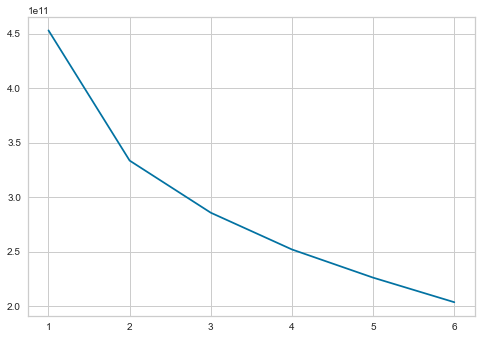

In [61]:
plt.plot(range(1,7),wcss)

Silhouette score for k(clusters) = 3 is 0.36576661731524984
Silhouette score for k(clusters) = 4 is 0.24654370144349036
Silhouette score for k(clusters) = 5 is 0.2515138950499174
Silhouette score for k(clusters) = 6 is 0.2411684908403328
Silhouette score for k(clusters) = 7 is 0.2587927376848977
Silhouette score for k(clusters) = 8 is 0.2655441569112328
Silhouette score for k(clusters) = 9 is 0.271172521980228


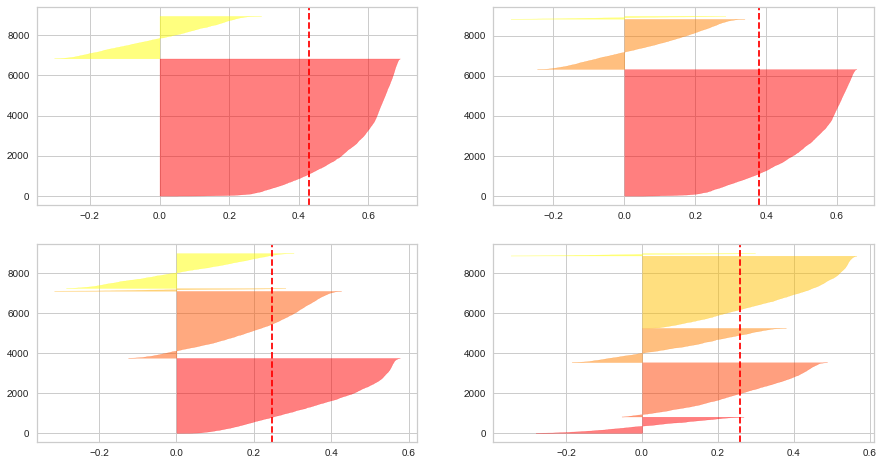

In [64]:
for i in range(3,10):
    kmeans=KMeans(n_clusters=i,
                  init="k-means++",
                  random_state=200)
    kmeans.fit(data)
    labels=kmeans.labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,
                                         labels,
                                         metric="euclidean",
                                         sample_size=1000,
                                         random_state=200)))

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='autumn', ax=ax[q-1][mod])
    visualizer.fit(x)